In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spam_data = pd.read_csv("spam.csv" , encoding='Latin-1')

In [5]:
spam_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
spam_data.shape

(5572, 5)

In [8]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [9]:
spam_data = spam_data.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'])

In [10]:
spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
spam_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
spam_data.duplicated().sum()

403

In [13]:
spam_data = spam_data.drop_duplicates(keep='first')

In [14]:
spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Renaming Columns

In [15]:
spam_data= spam_data.rename(columns={'v1':'targetfeature' , 'v2':'textcolumn'})

In [16]:
spam_data

,targetfeature,textcolumn
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Encoding target Feature

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
ec = LabelEncoder()

In [19]:
spam_data['targetfeature']=ec.fit_transform(spam_data['targetfeature'])

In [20]:
spam_data

,targetfeature,textcolumn
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Analyzing text column by character , word and sentences

In [21]:
import nltk

In [22]:
spam_data['totalcharacter']=(spam_data['textcolumn']).apply(len)

In [23]:
spam_data['totalwords']=spam_data['textcolumn'].apply((lambda x:len(nltk.word_tokenize(x))))

In [24]:
spam_data['totalsentence']=spam_data['textcolumn'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
spam_data

,targetfeature,textcolumn,totalcharacter,totalwords,totalsentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [26]:
spam_data[['totalcharacter' , 'totalwords' , 'totalsentence']].describe()

,totalcharacter,totalwords,totalsentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
import seaborn as sns

<Axes: >

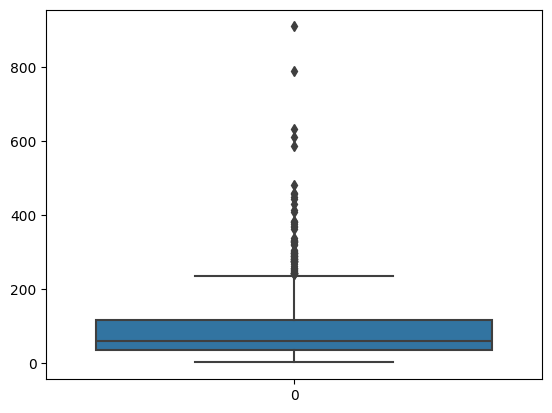

In [28]:
sns.boxplot(spam_data['totalcharacter'])

# Detecting Outliers and Balancing Data

In [29]:
spam_data.describe()

,targetfeature,totalcharacter,totalwords,totalsentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
#For totalcharacter
Q1 = 36.0
Q3 = 117.0
IQR = Q3 - Q1
IQR

81.0

In [31]:
lower_bound = Q1 - 1.5*IQR
print(lower_bound)
upper_bound = Q3 + 1.5*IQR
print(upper_bound)


-85.5
238.5


In [32]:
spam_data[spam_data['totalcharacter'] > upper_bound]

,targetfeature,textcolumn,totalcharacter,totalwords,totalsentence
53,0,Wow. I never realized that you were so embaras...,291,69,6
126,0,"Just so that you know,yetunde hasn't sent mone...",244,56,4
154,0,"You are everywhere dirt, on the floor, the win...",384,95,5
380,0,I guess that's why you re worried. You must kn...,300,70,6
424,0,Send this to ur friends and receive something ...,248,49,3
...,...,...,...,...,...
5082,0,Amazing : If you rearrange these letters it gi...,256,49,4
5209,0,"I know you are thinkin malaria. But relax, chi...",329,67,6
5451,0,Just sing HU. I think its also important to fi...,251,48,4
5515,0,You are a great role model. You are giving so ...,245,61,4


In [33]:
#For totalwords
Q1t = 9.0
Q3t = 26.0
IQRt = Q3t - Q1t
IQRt

17.0

In [34]:
lower_limit = Q1t - 1.5*IQRt
print(lower_limit)
upper_limit = Q3t + 1.5*IQRt
print(upper_limit)


-16.5
51.5


In [35]:
spam_data[spam_data['totalwords'] > upper_limit]

,targetfeature,textcolumn,totalcharacter,totalwords,totalsentence
53,0,Wow. I never realized that you were so embaras...,291,69,6
126,0,"Just so that you know,yetunde hasn't sent mone...",244,56,4
154,0,"You are everywhere dirt, on the floor, the win...",384,95,5
380,0,I guess that's why you re worried. You must kn...,300,70,6
472,0,Nothing. I meant that once the money enters yo...,298,67,4
...,...,...,...,...,...
5139,0,Oh shut it. Omg yesterday I had a dream that I...,228,55,5
5209,0,"I know you are thinkin malaria. But relax, chi...",329,67,6
5335,0,No. It's not pride. I'm almost &lt;#&gt; yea...,192,53,5
5515,0,You are a great role model. You are giving so ...,245,61,4


In [36]:
spam_data = spam_data[spam_data['totalwords'] < upper_limit]

In [37]:
spam_data

,targetfeature,textcolumn,totalcharacter,totalwords,totalsentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


# EXPLORATORY DATA ANALYSIS

<Axes: xlabel='targetfeature'>

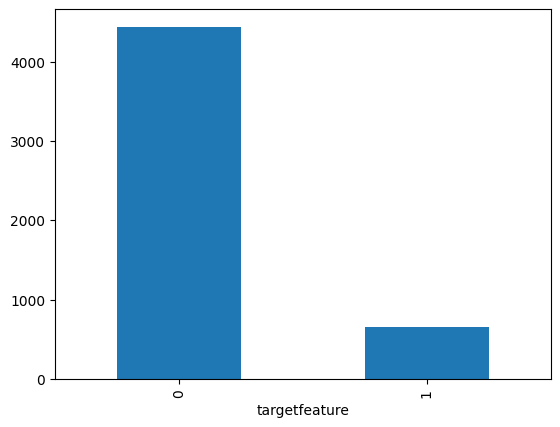

In [38]:
spam_data['targetfeature'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

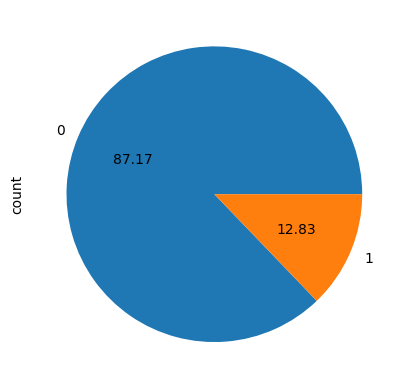

In [39]:
spam_data['targetfeature'].value_counts().plot(kind='pie' , autopct='%.2f')

C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totalcharacter', ylabel='Count'>

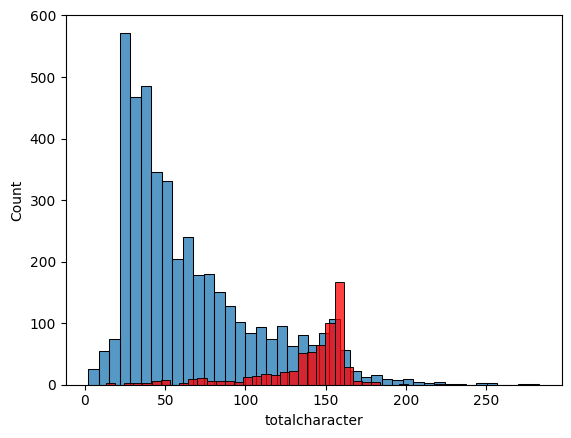

In [40]:
sns.histplot(spam_data[spam_data['targetfeature']==0]['totalcharacter'])
sns.histplot(spam_data[spam_data['targetfeature']==1]['totalcharacter'] , color='red')

C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totalwords', ylabel='Count'>

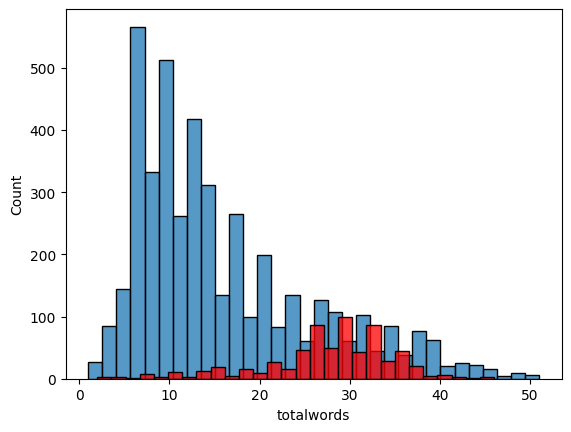

In [41]:
sns.histplot(spam_data[spam_data['targetfeature']==0]['totalwords'])
sns.histplot(spam_data[spam_data['targetfeature']==1]['totalwords'] , color='red')

C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\panse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

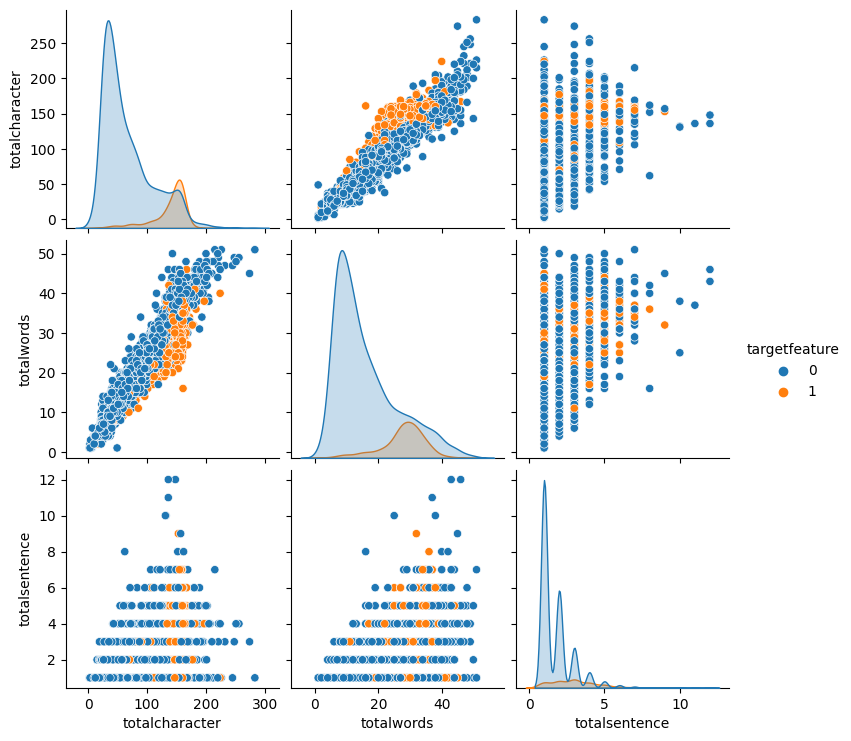

In [42]:
sns.pairplot(spam_data , hue='targetfeature')

# Text Preprocessing

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panse\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [43]:
from nltk.corpus import stopwords

stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [44]:
import string

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [46]:
def transforming_text(t):
    t = t.lower()
    t = nltk.word_tokenize(t)
    
    z=[]
    for i in t:
        if i.isalnum():
            z.append(i)
            
    t = z[:]
    z.clear()
    
    for i in t:
        if i not in stopwords.words('english') and i not in string.punctuation:
            z.append(i)
            
    t = z[:]
    z.clear()
    
    for i in t:
        z.append(ps.stem(i))
        
            
    return " ".join(z)
            
    

In [47]:
transforming_text('I Loved the YT lectures on Machine Learning. How about you? ')

'love yt lectur machin learn'

In [48]:
spam_data['text_transformed']=spam_data['textcolumn'].apply(transforming_text)

C:\Users\panse\AppData\Local\Temp\ipykernel_150996\316873632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['text_transformed']=spam_data['textcolumn'].apply(transforming_text)


In [49]:
spam_data

,targetfeature,textcolumn,totalcharacter,totalwords,totalsentence,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Fetching Important Words

In [73]:
from wordcloud import WordCloud

In [86]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_words = wc.generate(spam_data[spam_data['targetfeature']==1]['text_transformed'].str.cat(sep=" "))

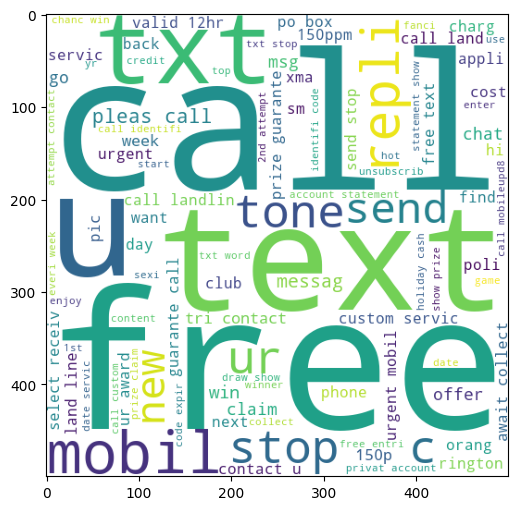

In [87]:
plt.figure(figsize=(15,6))
plt.imshow(spam_words)


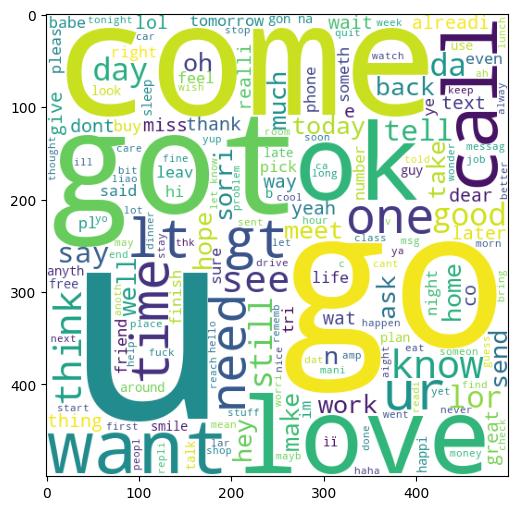

In [89]:
ham_words = wc.generate(spam_data[spam_data['targetfeature']==0]['text_transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_words)


# Top most Occuring 40 words in Spam message

In [98]:
spam_cor=[]
for item in spam_data[spam_data['targetfeature']==1]['text_transformed'].tolist():
    for msg in item.split():
        spam_cor.append(msg)
        
        

In [101]:
len(spam_cor)

9939

In [102]:
from collections import Counter

In [105]:
pd.DataFrame(Counter(spam_cor).most_common(40))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


# Top most Occuring 40 words in ham(No Spam) message

In [106]:
ham_cor=[]
for sen in spam_data[spam_data['targetfeature']==0]['text_transformed'].tolist():
    for word in sen.split():
        ham_cor.append(word)
        

In [107]:
len(ham_cor)

32930

In [108]:
pd.DataFrame(Counter(ham_cor).most_common(40))

,0,1
0,u,835
1,go,384
2,get,324
3,2,268
4,come,264
5,got,228
6,call,221
7,like,220
8,ok,215
9,lt,213


# Vectorizing Data For Training

In [50]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [74]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [75]:
X = tfidf.fit_transform(spam_data['text_transformed']).toarray()

In [76]:
X.shape

(5091, 4000)

In [77]:
y = spam_data['targetfeature'].values

In [78]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Making Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# Using 3 Models

In [81]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

# GaussianNB

In [82]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [83]:
y_pred_for_gnb = gnb.predict(X_test)

In [84]:
y_pred_for_gnb

array([1, 0, 0, ..., 0, 0, 0])

In [85]:
accuracy_score(y_test,y_pred_for_gnb)


0.8537782139352306

In [86]:
precision_score(y_test,y_pred_for_gnb)

0.4410480349344978

# MultinomialNB

In [87]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [88]:
y_pred_for_mnb = mnb.predict(X_test)

In [89]:
y_pred_for_mnb

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
accuracy_score(y_test,y_pred_for_mnb)

0.9646712463199215

In [91]:
precision_score(y_test,y_pred_for_mnb)

0.9886363636363636

# BernoulliNB

In [92]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [97]:
y_pred_for_bnb = bnb.predict(X_test)

In [98]:
y_pred_for_bnb

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
accuracy_score(y_test,y_pred_for_bnb)

0.9784102060843964

In [100]:
precision_score(y_test,y_pred_for_bnb)

1.0

In [101]:
import pickle

In [102]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb')) 